In [1]:
# Analisis de Clustering y perfilacion de clientes 

# Importamos las bibliotecas necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ALLAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ALLAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

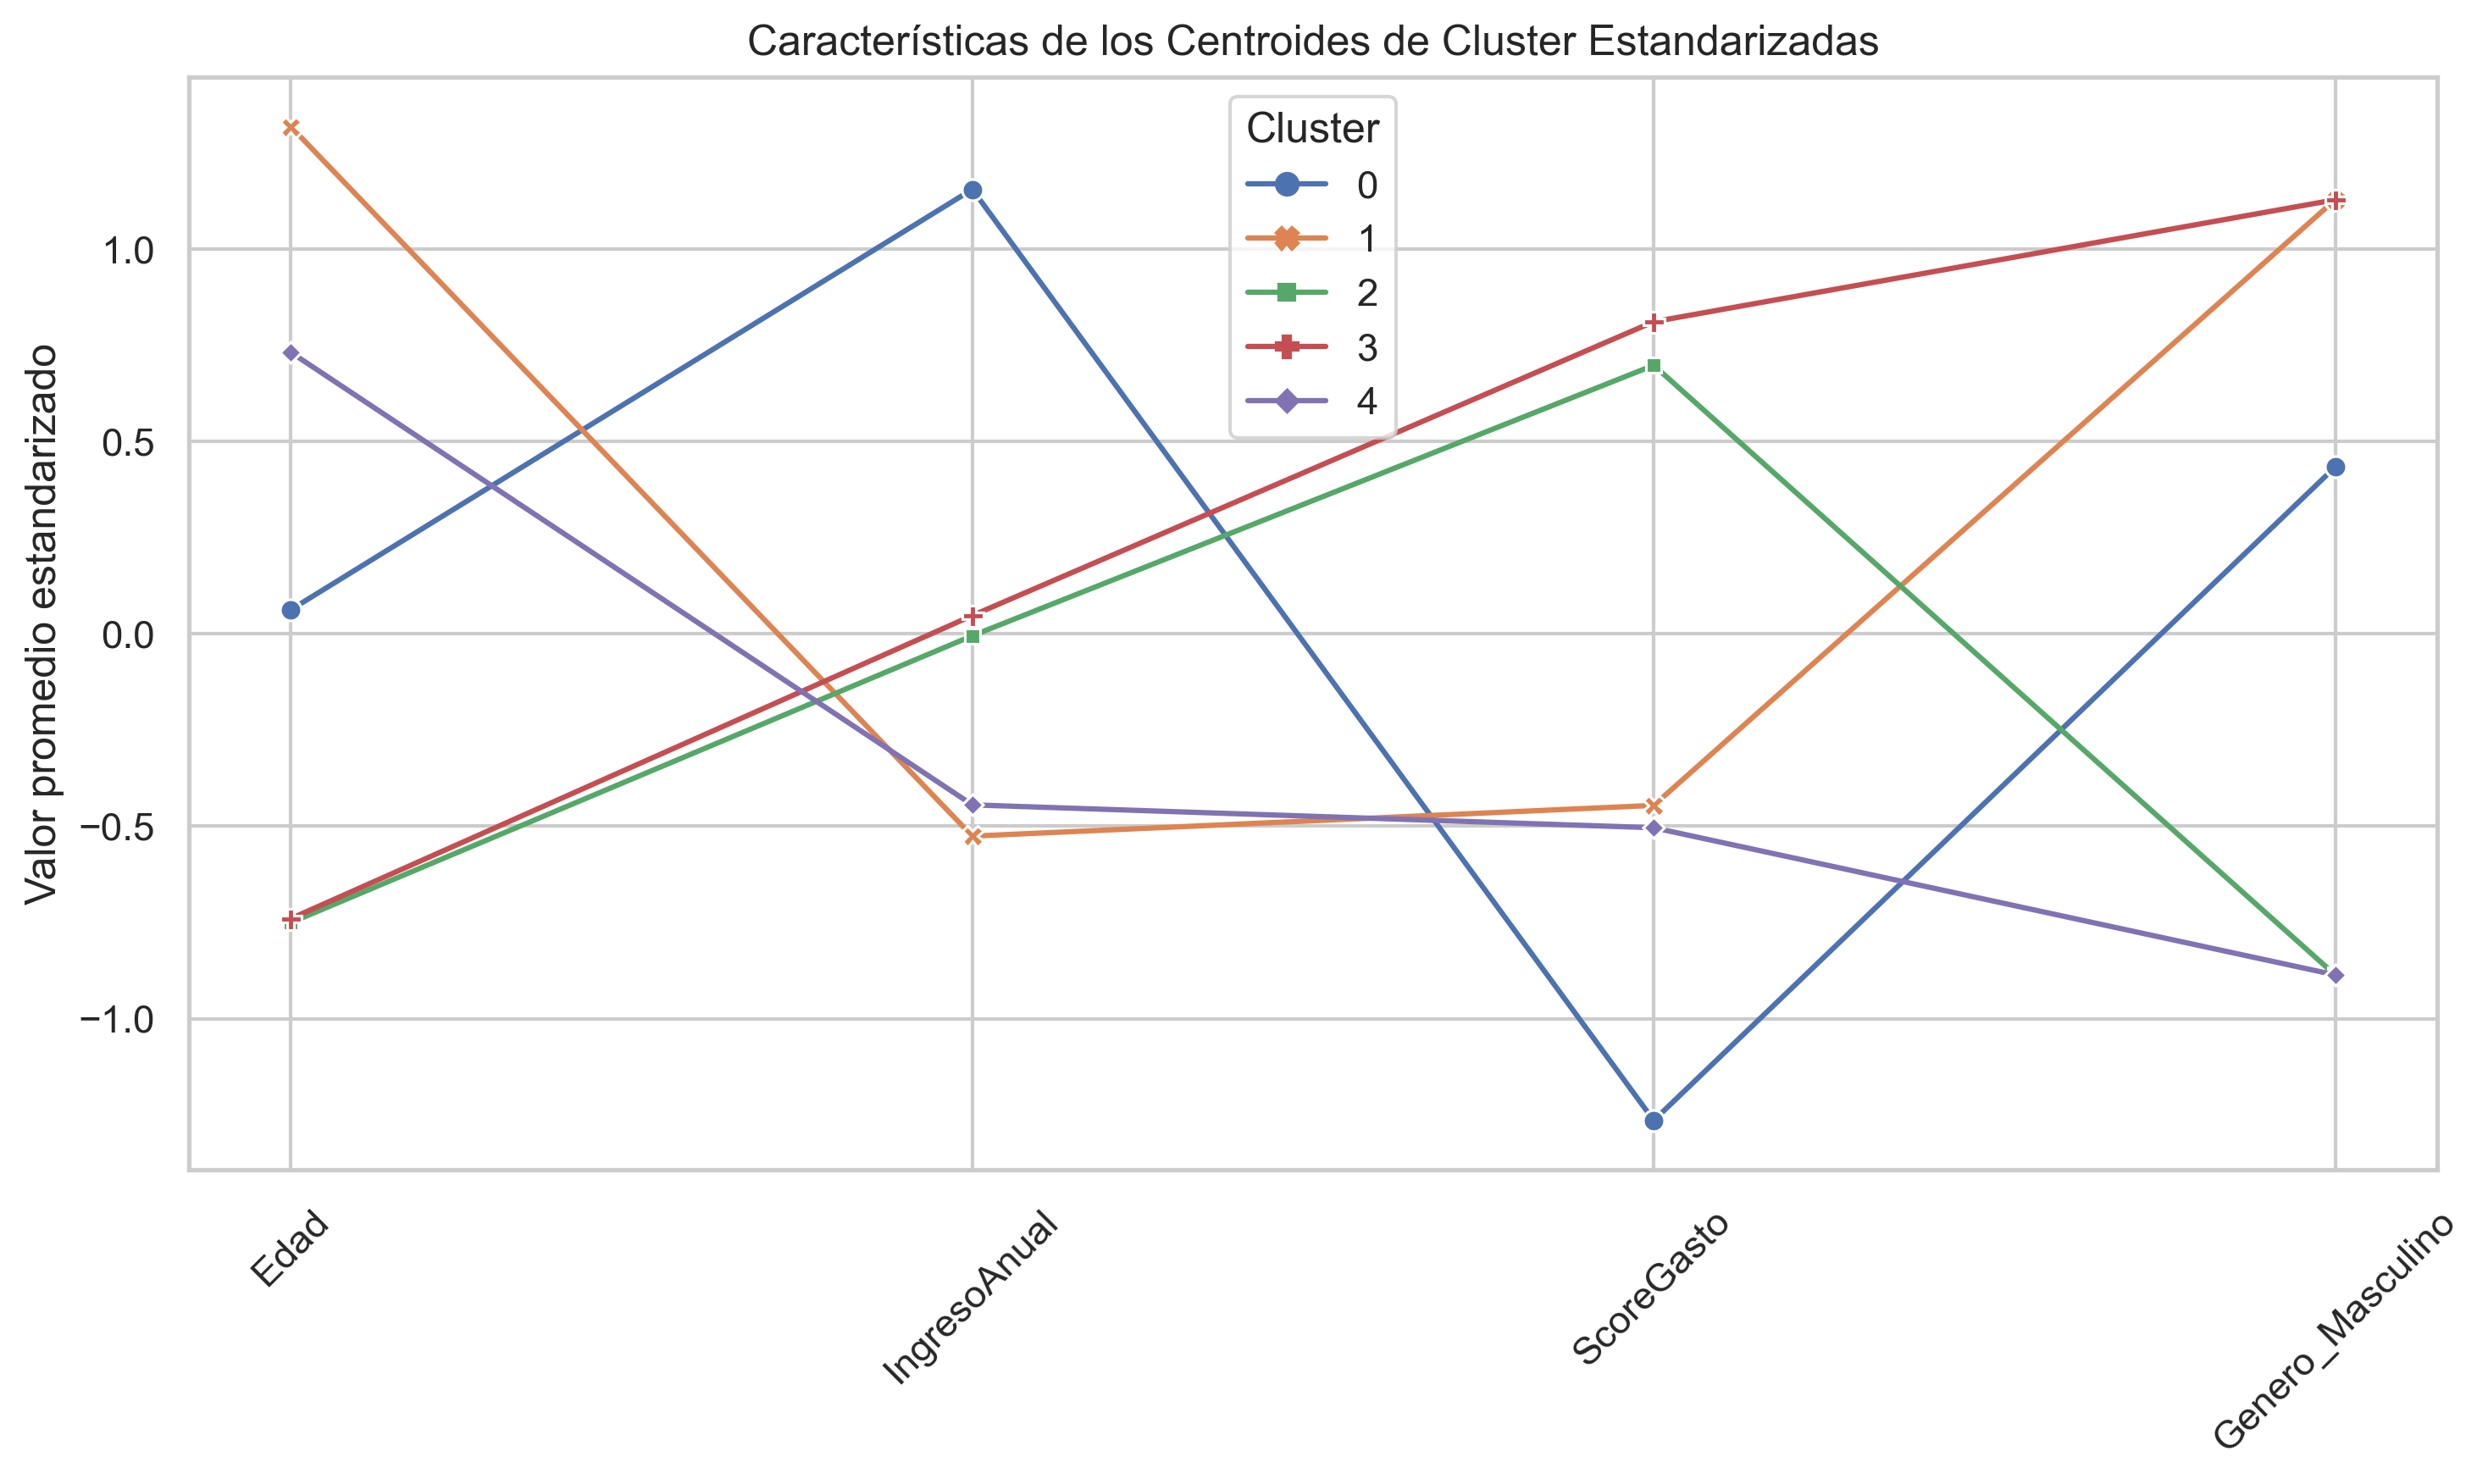

,Edad,IngresoAnual,ScoreGasto,Genero_Masculino
Cluster,,,,
0,39.724138,90.827586,17.620690,0.655172
1,57.214286,46.785714,38.714286,1.000000
2,28.392857,60.428571,68.178571,0.000000
3,28.536585,61.804878,71.097561,1.000000
4,49.043478,48.913043,37.217391,0.000000


In [3]:
# Función para realizar el análisis de clustering y generar los outputs solicitados
def analisis_clustering(k):
    # Carga de datos desde un archivo CSV
    datos = pd.read_csv('C:\\Users\\ALLAN\\Desktop\\Business Analitics con Python y ChatGPT\\centrocomercial.csv', delimiter=';', index_col='ID')

    # Preprocesamiento de datos categóricos:
    datos_preprocesados = pd.get_dummies(datos, columns=['Genero'], drop_first=True)

    # Estandarización de los datos numéricos:
    estandarizar = StandardScaler()
    datos_std = estandarizar.fit_transform(datos_preprocesados)

    # Implementación del análisis de clusters con KMeans
    modelo_kmeans = KMeans(n_clusters=k, init="k-means++", random_state=99)
    modelo_kmeans.fit(datos_std)
    
    # Añadimos los etiquetas de cluster a los datos preprocesados para su análisis
    datos_preprocesados['Cluster'] = modelo_kmeans.labels_

    # Crear una tabla de análisis agrupando por cluster y calculando la media de las variables
    df_analisis = datos_preprocesados.groupby('Cluster').mean()

    # Transponemos el DataFrame para que las categorías sean las columnas y los clusters las filas
    datos_std_df = pd.DataFrame(datos_std, columns=datos_preprocesados.columns[:-1])
    datos_std_df['Cluster'] = modelo_kmeans.labels_
    datos_std_df = datos_std_df.groupby('Cluster').mean().T

    # Generamos el gráfico de líneas con Seaborn
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6), dpi=300)
    sns.lineplot(data=datos_std_df, dashes=False, markers=True)
    plt.xticks(rotation=45)
    plt.title('Características de los Centroides de Cluster Estandarizadas')
    plt.ylabel('Valor promedio estandarizado')
    plt.legend(title='Cluster')
    plt.tight_layout()  # Ajusta automáticamente los parámetros de la figura para que quepan en el área de la figura

    # Mostramos el gráfico
    plt.show()

    return df_analisis

# Ejemplo de uso de la función con k = 5 (este valor puede ser modificado por el usuario)
df_analisis = analisis_clustering(k=5)
df_analisis

In [ ]:
# CONCLUSION SEGUN CLUSTER

#Cluster 0: "Profesionales Moderados"
#Edad promedio: 39.7 años.
#Ingreso anual: 90,827.59 unidades monetarias.
#Score de gasto: 17.6 (bajo).
#Género predominante: Mayoría masculina (65.5% hombres).

#Descripción:
#Este grupo está compuesto por profesionales en su mediana edad con ingresos relativamente altos, 
#pero con un comportamiento de gasto conservador dentro del centro comercial. Aunque cuentan con la capacidad financiera,
#su bajo Score de gasto indica que no son grandes consumidores en este espacio o que prefieren comprar productos o servicios
#esenciales y con una buena relación calidad-precio. Son pragmáticos y planifican sus compras, evitando gastos impulsivos.

#Comportamiento:

#Priorizan productos de alta calidad y durabilidad.
#Gasto enfocado en categorías esenciales, como tecnología, productos para el hogar o ropa formal.
#Compras planificadas, con poca inclinación hacia promociones o descuentos.

#Intereses: Tiendas de tecnología, productos financieros, y restaurantes de alta calidad pero esporádicos.

#Estrategia de marketing: Ofertas premium o de valor añadido en productos de interés, enfocarse en la calidad 
# antes que en la cantidad.


#Cluster 1: "Adultos Tradicionales"
#Edad promedio: 57.2 años.
#Ingreso anual: 46,785.71 unidades monetarias.
#Score de gasto: 38.7 (moderado-bajo).
#Género predominante: 100% masculino.
#Descripción:
#Este grupo está compuesto por hombres mayores que tienen ingresos medios. Son consumidores tradicionales que buscan
# comodidad y valor, y aunque su gasto no es elevado, tienden a ser constantes en sus visitas al centro comercial.
#Su interés se enfoca en productos de calidad moderada que respondan a sus necesidades diarias, y prefieren tiendas
#que ofrezcan fiabilidad y conveniencia.

Comportamiento:

Prefieren tiendas con productos esenciales, como ropa casual, alimentos y farmacias.
Buscan la comodidad y la familiaridad en sus compras, evitando riesgos con nuevas marcas.
Compras realizadas en tiendas físicas, con poco interés en tendencias o artículos de lujo.

Intereses: Tiendas de ropa cómoda, tecnología accesible y servicios esenciales.
Estrategia de marketing: Ofrecer descuentos para clientes frecuentes, promociones en productos duraderos o de uso diario.


Cluster 2: "Jóvenes Consumistas"
Edad promedio: 28.4 años.
Ingreso anual: 60,428.57 unidades monetarias.
Score de gasto: 68.2 (alto).
Género predominante: Femenino (0% hombres).
Descripción:
Este grupo se caracteriza por ser jóvenes con ingresos medios, predominantemente mujeres, con una actitud de consumo alta
en el centro comercial. Este perfil de cliente está altamente influenciado por tendencias de moda y estilo de vida, 
y son propensos a gastar en productos de moda, belleza, entretenimiento y tecnología. Son compradores impulsivos y responden
bien a las promociones y las experiencias de compra.  

Comportamiento:

Invierten en moda, belleza y entretenimiento.
Alta sensibilidad a las tendencias y promociones.
Participan activamente en eventos o actividades del centro comercial.

Intereses: Moda, belleza, entretenimiento y productos de estilo de vida.
Estrategia de marketing: Ofertas por tiempo limitado, promociones de productos de tendencia y experiencia de compra personalizada.


Cluster 3: "Jóvenes Compradores Rápidos"
Edad promedio: 28.5 años.
Ingreso anual: 61,804.88 unidades monetarias.
Score de gasto: 71.1 (alto).
Género predominante: 100% masculino.
Descripción:
Jóvenes profesionales masculinos que gastan significativamente en el centro comercial, con ingresos medios. 
Son compradores activos y rápidos que valoran la conveniencia y la eficiencia en sus compras. Prefieren productos tecnológicos,
ropa y accesorios que les ayuden a destacar en su entorno social o laboral. Este grupo responde bien a la innovación 
y los productos de alta gama, pero también valoran las experiencias rápidas y fluidas de compra. 

Comportamiento:

Compras frecuentes de tecnología, gadgets y ropa de moda.
Gastan en experiencias sociales, como restaurantes y entretenimiento.
Alta predisposición a seguir tendencias tecnológicas y de moda.

Intereses: Tecnología, ropa de marca, entretenimiento y productos para el hogar.
Estrategia de marketing: Experiencia de compra rápida y eficiente, promociones en tecnología y moda de lujo, productos de 
nicho innovadores.

Cluster 4: "Adultas Ahorradoras"
Edad promedio: 49 años.
Ingreso anual: 48,913.04 unidades monetarias.
Score de gasto: 37.2 (moderado-bajo).
Género predominante: Femenino (0% hombres).
Descripción:
Este grupo está compuesto por mujeres adultas de mediana edad con ingresos medios-bajos. Son clientes que tienden a ser 
cautelosas con sus gastos, prefiriendo ofertas, descuentos y productos funcionales y de calidad moderada. 
Buscan valor por su dinero y prefieren tiendas que ofrezcan productos esenciales y promociones regulares.
Su comportamiento de compra es planificado y racional, lo que las convierte en clientas leales, aunque conservadoras.

Comportamiento:

Compras dirigidas a productos funcionales y duraderos, como artículos para el hogar y moda básica.
Prefieren promociones y productos con buena relación calidad-precio.
Compran en tiendas físicas, con un enfoque en la comodidad y el servicio al cliente.

Intereses: Hogar, salud, productos de primera necesidad, ropa cómoda y funcional.
Estrategia de marketing: Ofertas de descuentos frecuentes, promociones por lealtad, y packs de productos esenciales.


Resumen de Perfiles:
Profesionales Moderados: Hombres en sus 40s con altos ingresos, pero bajo nivel de gasto. Valor de compra planificado.
Adultos Tradicionales: Hombres mayores con ingresos moderados y comportamiento de compra constante y conservador.
Jóvenes Consumistas: Mujeres jóvenes con ingresos medios y un alto nivel de gasto en productos de moda y estilo de vida.
Jóvenes Compradores Rápidos: Hombres jóvenes con ingresos medios y alto nivel de gasto, interesados en tecnología y moda de lujo.
Adultas Ahorradoras: Mujeres adultas con ingresos moderados que prefieren productos esenciales y ofertas.
Estos perfiles pueden ayudar a segmentar mejor a los clientes y adaptar estrategias de marketing y ventas específicas para cada grupo,
maximizando las oportunidades de interacción y fidelización.